In [1]:
## import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist  # call hist, otherwise np.histogram
import matplotlib.pyplot as plt



In [2]:
import histogram_module
import dist_module
import match_module

In [7]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

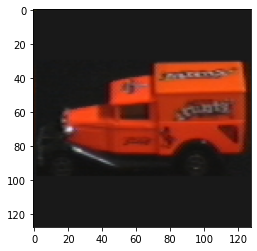

In [4]:
img_color = np.array(Image.open('./model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

# plt.figure()
# plt.subplot(1,3,1)
plt.imshow(img_color)

[   0    0  614 9855  934  278  252  181  215  214  325  443  625  683
  291  187  196  192  295  433  127   10    8    6    6    2    2    2
    0    2    2    0    3    0    0    0    0    1    0    0] [  0.      6.375  12.75   19.125  25.5    31.875  38.25   44.625  51.
  57.375  63.75   70.125  76.5    82.875  89.25   95.625 102.    108.375
 114.75  121.125 127.5   133.875 140.25  146.625 153.    159.375 165.75
 172.125 178.5   184.875 191.25  197.625 204.    210.375 216.75  223.125
 229.5   235.875 242.25  248.625 255.   ]


<BarContainer object of 40 artists>

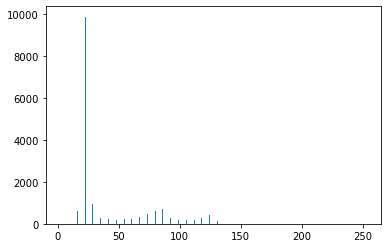

In [5]:
# plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
print(hist_gray1, bin_gray1)
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1)

<BarContainer object of 40 artists>

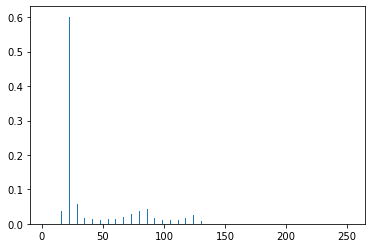

In [6]:
# plt.subplot(1,3,3)
hist_gray2, bin_gray2 = histogram_module.normalized_hist(img_gray, num_bins_gray)
# print(hist_gray2, bin_gray2)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2)

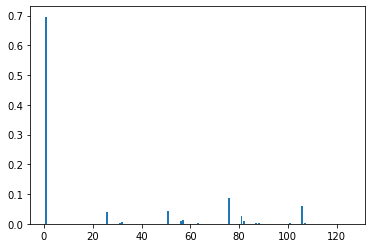

In [8]:
# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(img_color)

num_bins_color = 5
# plt.subplot(1,2,2)
hist_rgb1 = histogram_module.rgb_hist(img_color.astype('double'), num_bins_color)
# print()
plt.bar(np.array(range(1,hist_rgb1.size+1)),hist_rgb1)
plt.show()

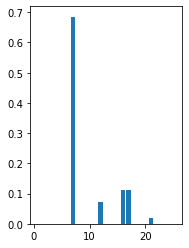

In [9]:
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rgb1 = histogram_module.rg_hist(img_color.astype('double'), num_bins_color)
print()
plt.bar(np.array(range(1,hist_rgb1.size+1)),hist_rgb1)
plt.show()

In [3]:
with open('model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

eval_dist_type = 'intersect'
eval_hist_type = 'rg'
eval_num_bins = 5


# [best_match, D] = match_module.find_best_match(model_images, query_images, eval_dist_type, eval_hist_type, eval_num_bins)



# ## visualize nearest neighbors (Question 3.b)
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
match_module.show_neighbors(model_images, query_images_vis, eval_dist_type, eval_hist_type, eval_num_bins)

0 0
0 1
0 2
0 3
0 4
1 0


ValueError: num must be 1 <= num <= 2, not 6